# Car Insurance Customer Segmentation

**Business Task:**

The goal of this analysis is to segment car insurance customers into distinct groups based on their demographics, vehicle, and policy characteristics. Distinct customer clusters will be identified via unsupervised machine learning techniques. These clusters will help the insurance company identify high-risk customer clusters that may correspond to higher claim probabilities, personalize marketing and retention strategies, and design differentiated premium structures or offers.

**Dataset Information:**

The "Car Insurance Claim Prediction" dataset was obtained from Kaggle. The dataset contains information of 50k+ policyholders.

The dataset can be accessed here: https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load and Inspect Data

In [2]:
insurance_df = pd.read_csv("Downloads/Car Insurance Claim Prediction - Kaggle/car_insurance_train.csv",
                          header=0)

In [3]:
insurance_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
insurance_df.shape

(58592, 44)

In [5]:
insurance_df.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [6]:
insurance_df.dtypes.value_counts()

object     28
int64      12
float64     4
Name: count, dtype: int64

In [7]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


The features `age_of_car` and `age_of_policyholder` have been standardized to be between 0 and 1. The feature `make` has been enoded to numerically represent the car's manufacturer/brand. The feature `ncap_rating` represents the safety rating out of 5 given by NCAP.

In [8]:
insurance_df.describe(include="object").T

,count,unique,top,freq
policy_id,58592,58592,ID00001,1
area_cluster,58592,22,C8,13654
segment,58592,6,B2,18314
model,58592,11,M1,14948
fuel_type,58592,3,Petrol,20532
max_torque,58592,9,113Nm@4400rpm,17796
max_power,58592,9,88.50bhp@6000rpm,17796
engine_type,58592,11,F8D Petrol Engine,14948
is_esc,58592,2,No,40191
is_adjustable_steering,58592,2,Yes,35526


All observations have a unique policy ID.

In [9]:
insurance_df.isna().sum().sum()

0

In [10]:
insurance_df.duplicated().sum()

0

There are no missing values or duplicated rows.

## Exploratory Data Analysis

### Data Distribution

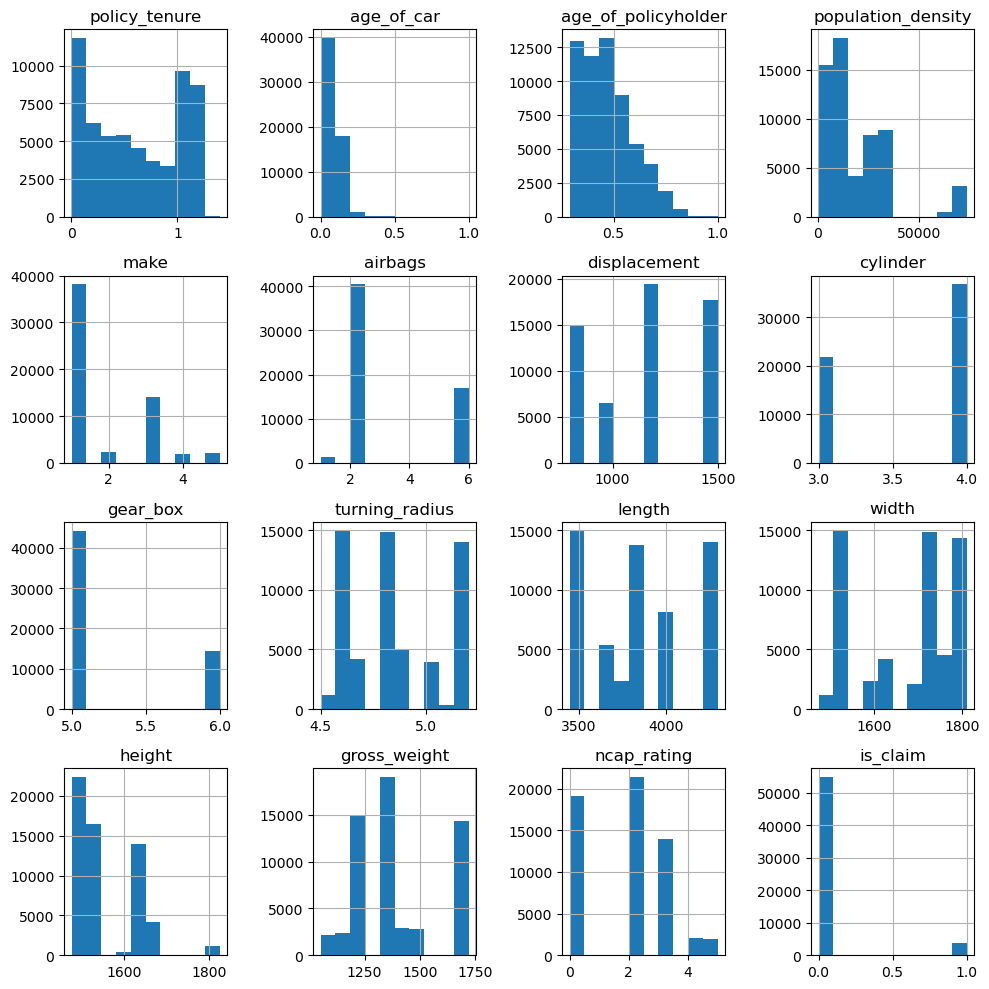

In [11]:
insurance_df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

In [12]:
insurance_df.select_dtypes(include="number").columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

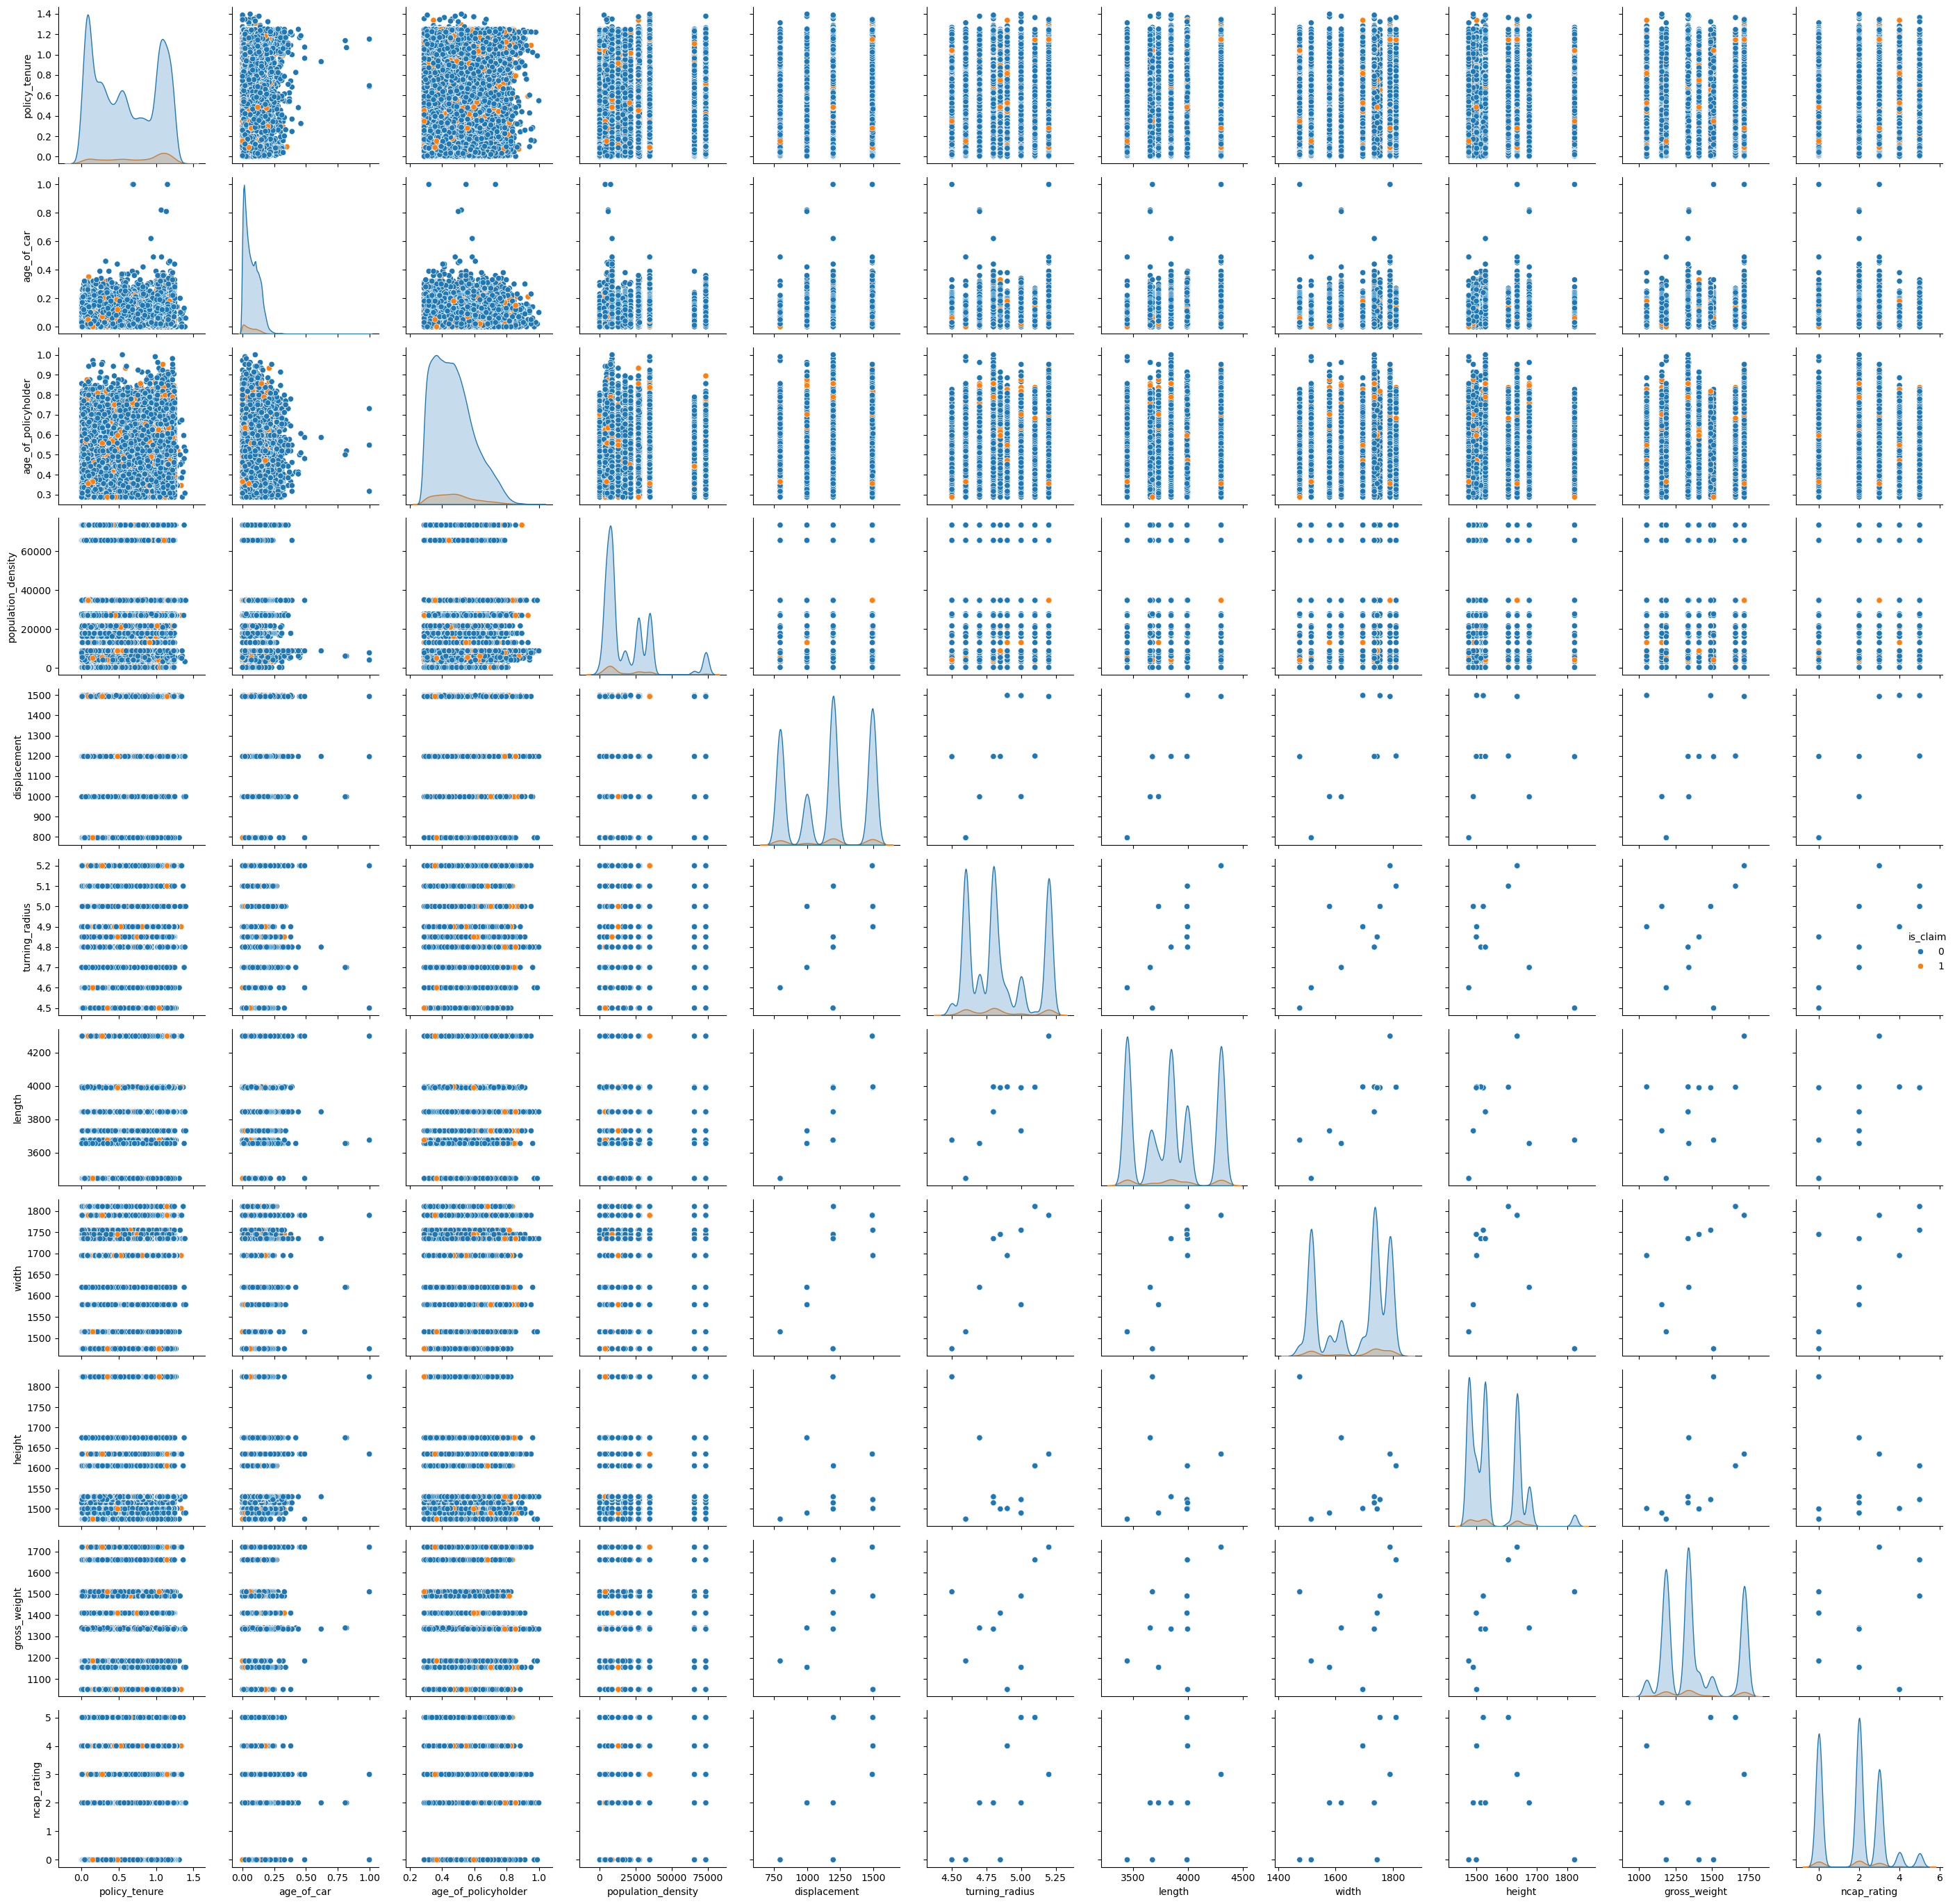

In [133]:
continuous_cols = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
                   'population_density', 'displacement', 'turning_radius',
                  'length', 'width', 'height', 'gross_weight', 'ncap_rating', 
                   'is_claim']

sns.pairplot(insurance_df[continuous_cols], hue="is_claim")
plt.tight_layout()
plt.show()

### Correlation Analysis

In [14]:
# correlation matrix
corr_matrix = insurance_df.corr(numeric_only=True).round(2).abs()

# Unstack the matrix into a Series
corr_pairs = corr_matrix.unstack()

# Drop self-correlations (where row == column)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Drop duplicate pairs (since correlation is symmetric)
corr_pairs = corr_pairs.drop_duplicates().sort_values(ascending=False)

corr_pairs.head(20)

displacement    length            0.96
turning_radius  length            0.94
length          width             0.92
displacement    width             0.90
gear_box        gross_weight      0.89
displacement    turning_radius    0.88
                cylinder          0.87
airbags         gear_box          0.86
displacement    ncap_rating       0.85
airbags         gross_weight      0.83
turning_radius  gross_weight      0.82
airbags         turning_radius    0.81
make            ncap_rating       0.79
displacement    gross_weight      0.78
length          ncap_rating       0.77
make            displacement      0.75
width           gross_weight      0.73
make            length            0.69
airbags         displacement      0.66
                width             0.64
dtype: float64

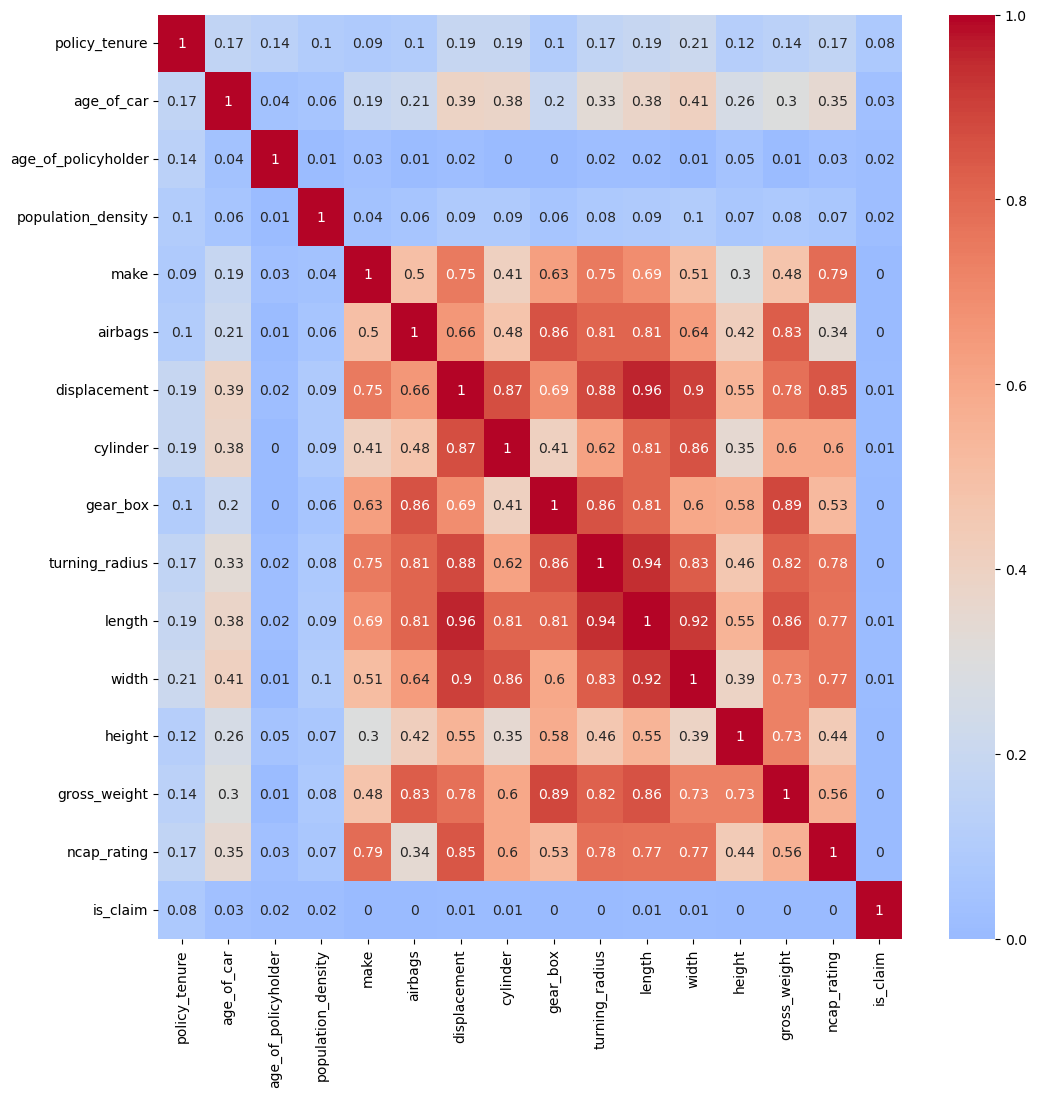

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=.3)
plt.show()

Correlation values > 0.7 are considered high. This indicates that dimensionality reduction techniques might be necessary.

## Data Preprocessing

### Skew

In [16]:
insurance_df_2 = insurance_df.copy()

In [17]:
skew = insurance_df_2.select_dtypes(include="number").skew().abs().sort_values(ascending=False)
print(skew)

is_claim               3.563967
population_density     1.674178
make                   1.197457
gear_box               1.183054
age_of_car             1.094081
height                 1.035498
airbags                0.905946
age_of_policyholder    0.640049
gross_weight           0.546949
cylinder               0.525074
width                  0.488392
turning_radius         0.420983
length                 0.145801
displacement           0.105317
ncap_rating            0.085147
policy_tenure          0.053588
dtype: float64


Features with skew greater than 0.75 will be transformed to reduce skew. The `is_claim` variable will be dropped, since that is the target variable, and it is not necessary for this analysis.

In [18]:
skewed_features = skew[(skew > 0.75) & (skew.index != "is_claim")].index.tolist()
print(skewed_features)

['population_density', 'make', 'gear_box', 'age_of_car', 'height', 'airbags']


In [19]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method="yeo-johnson", standardize=False)
insurance_df_2[skewed_features] = pt.fit_transform(insurance_df_2[skewed_features])

In [20]:
insurance_df_2[skewed_features].skew().abs().sort_values(ascending=False)

make                  0.664734
airbags               0.205748
age_of_car            0.124488
population_density    0.013149
gear_box              0.000000
height                0.000000
dtype: float64

### One-hot Encoding

In [21]:
insurance_df_3 = insurance_df_2.copy()

I will remove the `policy_id` column since it doesn't provide any information.

In [22]:
insurance_df_3 = insurance_df_3.drop("policy_id",axis=1)

In [23]:
unique_vals = insurance_df_3.select_dtypes(include="object").nunique()
high_cat_cols = unique_vals[unique_vals > 2].index.tolist()
print(high_cat_cols)

['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'steering_type']


In [24]:
for col in high_cat_cols:
    print(insurance_df_3[col].value_counts(normalize=True))
    print()

area_cluster
C8     0.233035
C2     0.125307
C5     0.119112
C3     0.104127
C14    0.062466
C13    0.058421
C10    0.053847
C9     0.046662
C7     0.036985
C12    0.027120
C1     0.025055
C11    0.020685
C19    0.016248
C6     0.015190
C15    0.013159
C4     0.011350
C17    0.008397
C16    0.006844
C21    0.006468
C18    0.004130
C22    0.003533
C20    0.001860
Name: proportion, dtype: float64

segment
B2         0.312568
A          0.295621
C2         0.239248
B1         0.071221
C1         0.060708
Utility    0.020634
Name: proportion, dtype: float64

model
M1     0.255120
M4     0.239248
M6     0.235117
M8     0.071221
M7     0.050177
M3     0.040500
M9     0.036080
M5     0.027273
M10    0.020634
M2     0.018433
M11    0.006195
Name: proportion, dtype: float64

fuel_type
Petrol    0.350423
CNG       0.346976
Diesel    0.302601
Name: proportion, dtype: float64

max_torque
113Nm@4400rpm     0.303727
60Nm@3500rpm      0.255120
250Nm@2750rpm     0.239248
82.1Nm@3400rpm    0.071221
91N

Features that have more than one value that represents less than 5% of the data for that feature will have those values replaced with "Other." This will help to reduce the number of dimensions after one-hot encoding.

In [25]:
values_to_keep = []

for col in high_cat_cols:
    keep_values = insurance_df_3[col].value_counts(normalize=True)[lambda x: x > 0.05].index.tolist()
    values_to_keep.append(keep_values)

In [26]:
values_to_keep

[['C8', 'C2', 'C5', 'C3', 'C14', 'C13', 'C10'],
 ['B2', 'A', 'C2', 'B1', 'C1'],
 ['M1', 'M4', 'M6', 'M8', 'M7'],
 ['Petrol', 'CNG', 'Diesel'],
 ['113Nm@4400rpm', '60Nm@3500rpm', '250Nm@2750rpm', '82.1Nm@3400rpm'],
 ['88.50bhp@6000rpm',
  '40.36bhp@6000rpm',
  '113.45bhp@4000rpm',
  '55.92bhp@5300rpm'],
 ['F8D Petrol Engine',
  '1.5 L U2 CRDi',
  'K Series Dual jet',
  'K10C',
  '1.2 L K Series Engine'],
 ['Power', 'Electric']]

In [27]:
insurance_df_3.loc[~insurance_df_3["area_cluster"].isin(
    values_to_keep[0]), "area_cluster"] = "Other"

In [28]:
insurance_df_3["area_cluster"].value_counts(normalize=True)

area_cluster
Other    0.243685
C8       0.233035
C2       0.125307
C5       0.119112
C3       0.104127
C14      0.062466
C13      0.058421
C10      0.053847
Name: proportion, dtype: float64

Now, all values in the feature make up at least 5% of the data. This will be repeated for the other categorical variables.

In [29]:
insurance_df_3.loc[~insurance_df_3["model"].isin(
    values_to_keep[2]), "model"] = "Other"

In [30]:
insurance_df_3.loc[~insurance_df_3["max_torque"].isin(
    values_to_keep[4]), "max_torque"] = "Other"

In [31]:
insurance_df_3.loc[~insurance_df_3["max_power"].isin(
    values_to_keep[5]), "max_power"] = "Other"

In [32]:
insurance_df_3.loc[~insurance_df_3["engine_type"].isin(
    values_to_keep[6]), "engine_type"] = "Other"

Now, I can perform encoding without having an excessive number of features.

In [33]:
insurance_df_3.select_dtypes(include="object").columns

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

Since none of these columns are ordinal or cyclical, they will be one-hot encoded.

In [34]:
insurance_df_3 = pd.get_dummies(insurance_df_3, 
                                columns=insurance_df_3.select_dtypes(include="object").columns, 
                                drop_first=True, dtype=int)

In [35]:
insurance_df_3.shape

(58592, 69)

26 features were added with one-hot encoding.

## Model Preparation

In [36]:
X = insurance_df_3.drop("is_claim", axis=1)

In [37]:
y = insurance_df_3["is_claim"]

In [38]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(X), columns=X.columns, index=X.index)

In [39]:
X.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,0.368130,0.270307,0.500000,0.433331,0.000000,0.562954,0.000000,0.0,0.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.480580,0.119914,0.121622,0.768058,0.000000,0.562954,0.000000,0.0,0.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.601457,0.119914,0.135135,0.397494,0.000000,0.562954,0.000000,0.0,0.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.643904,0.491410,0.202703,0.720123,0.000000,0.562954,0.571225,1.0,0.0,0.428571,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.425902,0.491410,0.486486,0.823921,0.703796,0.562954,0.289174,0.0,0.0,0.714286,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


## Cluster Visualization

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

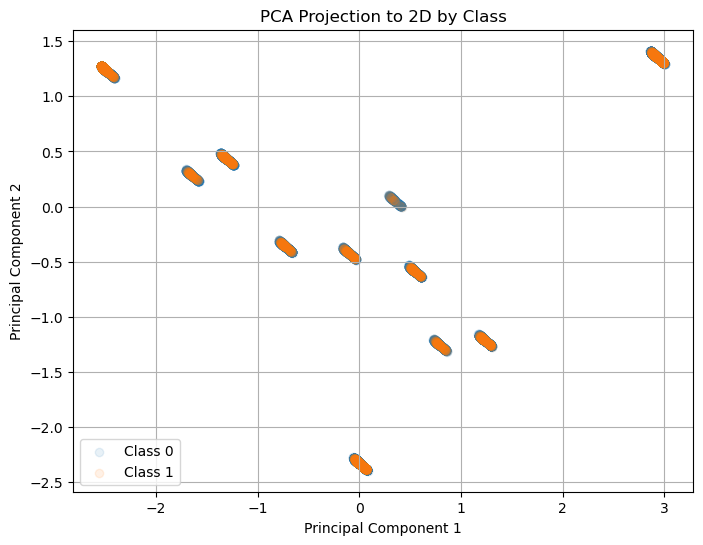

In [41]:
plt.figure(figsize=(8,6))
for label in set(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f'Class {label}', alpha=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection to 2D by Class')
plt.legend()
plt.grid(True)
plt.show()

PCA is showing artificial clusters due to one-hot encoded features.

In [42]:
import umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=11)
embedding = reducer.fit_transform(X)

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/var/folders/qw/gb8w900j4q34f5_syyq3n5600000gn/T/ipykernel_24524/3076924927.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


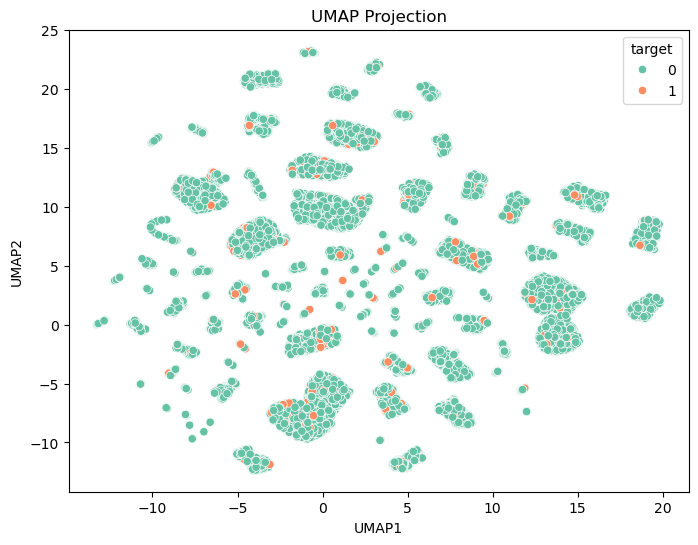

In [43]:
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['target'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='UMAP1', y='UMAP2',
    hue='target',
    palette=sns.color_palette('Set2', 3),
    data=embedding_df
)
plt.title("UMAP Projection")
plt.show()

## PCA Dimensionality Reduction

In [44]:
pca = PCA()
X_pca = pca.fit(X)

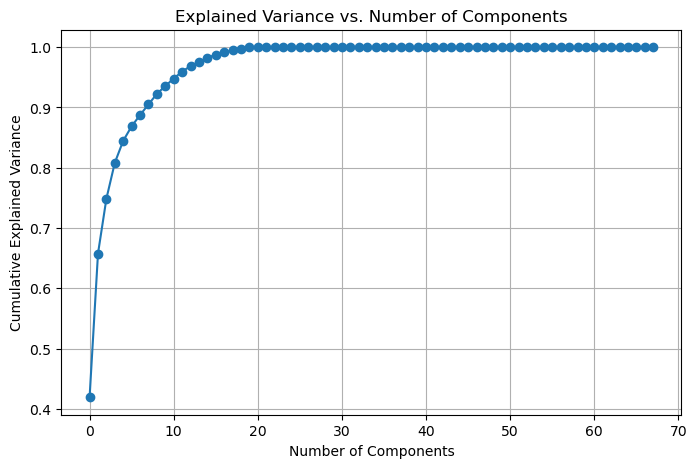

In [45]:
# Plot explained variance, use elbow method to pick best n_components
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

More than 95% variance is explained with 15 components.

In [46]:
pca = PCA(n_components=15, random_state=11)
X_pca = pca.fit_transform(X)

In [47]:
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(15)])

### Feature Importance

In [48]:
# See feature importance
loadings = np.abs(pca.components_[:15, :])
feature_scores = loadings.sum(axis=0).round(3)
# Map to feature names
feature_importance = pd.Series(feature_scores, index=X.columns)
important_features = feature_importance.sort_values(ascending=False)
important_features.head(10)

area_cluster_C8                2.376
area_cluster_C2                2.219
area_cluster_C3                2.048
policy_tenure                  1.886
area_cluster_Other             1.874
area_cluster_C14               1.860
area_cluster_C5                1.729
area_cluster_C13               1.697
segment_C1                     1.391
is_rear_window_defogger_Yes    1.390
dtype: float64

The most important features are where the policyholder lives and the policy tenure.

## Model Fitting - K-means

In [49]:
from sklearn.cluster import KMeans, MiniBatchKMeans

# find optimal K using elbow method to plot clusters vs inertia
inertia = []

for k in range(1, 13):
    minikmeans = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=11)
    minikmeans.fit(X_pca)
    inertia.append(minikmeans.inertia_)

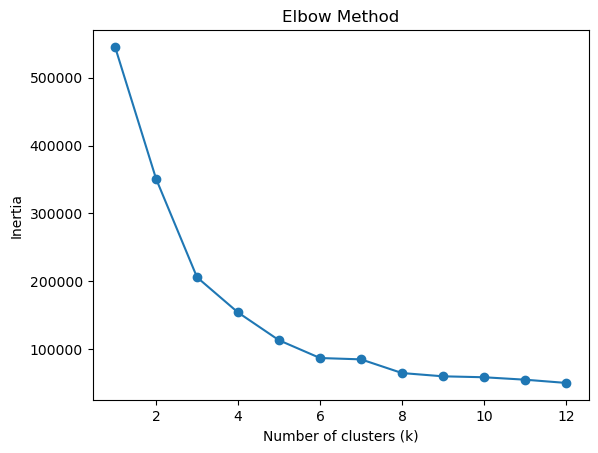

In [50]:
plt.plot(range(1, 13), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

The ideal number of clusters appears to be 6, as the inertia plateaus after that.

In [51]:
best_k = 6
kmeans = KMeans(n_clusters=best_k, random_state=11)
kmeans.fit(X_pca)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [52]:
from sklearn.metrics import silhouette_score
silhouette_score_kmeans = silhouette_score(X_pca, kmeans.labels_)

In [53]:
kmeans.inertia_

114206.24457526676

In [54]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
db_index_kmeans = davies_bouldin_score(X_pca, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(X_pca, kmeans.labels_)

In [55]:
print(f"The Silhouette Score is {silhouette_score_kmeans:.3}.")
print(f"The Davies-Bouldin index is {db_index_kmeans:.3}.")
print(f"The Calinski-Harabasz score is {ch_score_kmeans:.3}.")

The Silhouette Score is 0.564.
The Davies-Bouldin index is 0.954.
The Calinski-Harabasz score is 4.42e+04.


A Silhouette Score above 0.5 is generally considered good, as it means the clusters are reasonably well-separated. A Davies-Bouldin index less than 1 indicates compact and well-separated clusters. A high Calinski-Harabasz score, like the one the observed here, indicates high between-cluster variance and low within-cluster variance. Overall, these results are very good.

In [56]:
cluster_labels = kmeans.predict(X_pca)
# Add cluster labels back to the original data
X_with_clusters = X.copy()
X_with_clusters["cluster_label"] = cluster_labels

In [57]:
X_with_clusters["cluster_label"].head()

0    1
1    1
2    1
3    0
4    5
Name: cluster_label, dtype: int32

In [58]:
# Examine cluster profiles using original features
X_with_clusters.groupby("cluster_label").mean()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,0.470840,0.376273,0.240352,0.614026,0.000000,0.882585,0.571225,1.000000,0.000000e+00,0.480810,...,0.731343,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.348762,0.178188,0.256066,0.629277,0.000000,0.562954,0.062799,0.000000,0.000000e+00,0.174035,...,0.000000,0.000000,0.000000,0.218242,0.218242,1.000000,0.000000,0.000000,0.218242,1.000000
2,0.486481,0.388179,0.253445,0.604838,0.893383,1.000000,0.992877,1.000000,5.898060e-16,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
3,0.443741,0.351864,0.233855,0.625207,0.758580,0.434148,0.871878,0.931302,4.051847e-17,0.503515,...,0.000000,0.468774,0.068698,0.771196,0.771196,0.771196,0.468774,0.400076,0.771196,0.931302
4,0.490843,0.380093,0.268527,0.609787,0.000000,0.562954,0.571225,1.000000,0.000000e+00,0.428571,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.459700,0.347221,0.232173,0.634250,0.703796,0.562954,0.289174,0.000000,0.000000e+00,0.714286,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000


## Model Fitting - Hierarchical Agglomerative Clustering

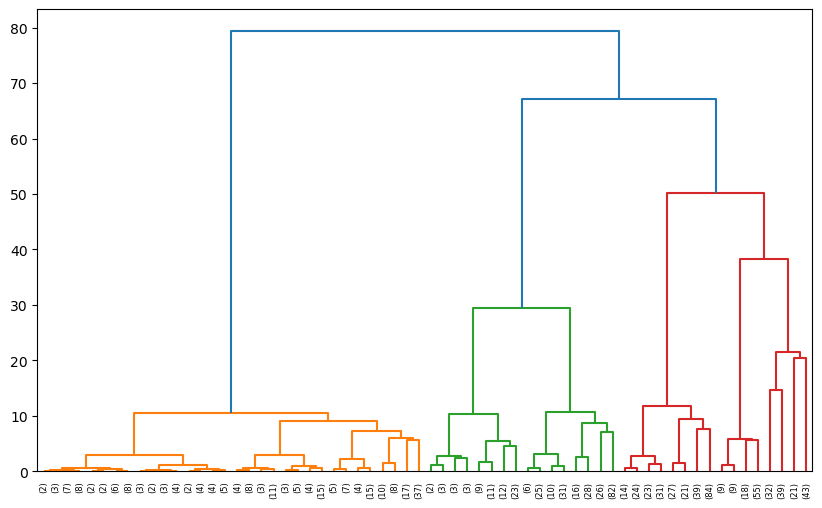

In [59]:
# determine the best value for the distance_threshold using a dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

subset_indices = np.random.choice(X_pca.shape[0], size=1000, replace=False)
X_sample = X_pca.iloc[subset_indices, :]

linked = linkage(X_sample, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.show()

In [60]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(
    linkage="ward", distance_threshold=25, n_clusters=None)
hac.fit_predict(X_sample)
labels_hac = hac.labels_

In [61]:
print(f"There are {len(set(labels_hac))} clusters.")

There are 6 clusters.


In [62]:
silhouette_score_hac = silhouette_score(X_sample, labels_hac)
db_index_hac = davies_bouldin_score(X_sample, labels_hac)
ch_score_hac = calinski_harabasz_score(X_sample, labels_hac)

In [63]:
print(f"The Silhouette Score is {silhouette_score_hac:.3}.")
print(f"The Davies-Bouldin index is {db_index_hac:.3}.")
print(f"The Calinski-Harabasz score is {ch_score_hac:.3}.")

The Silhouette Score is 0.605.
The Davies-Bouldin index is 0.849.
The Calinski-Harabasz score is 1.06e+03.


Hierarchical agglomerative clustering produced slightly better results than K-means in terms of the Silhouette Score and Davies-Bouldin index. However, the model was fit on a sample of 1,000 points, since hierarchical agglomerative clustering performs exponentially slower as the number of data points increases. Therefore, K-means is preferred.

## Model Fitting - DBSCAN

In [126]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=16)
dbscan.fit(X_sample)
labels_dbscan = dbscan.labels_

In [129]:
set(labels_dbscan)

{0, 1, 2, 3, 4}

In [130]:
print(f"There are {len(set(labels_dbscan))} clusters.")

There are 5 clusters.


In [131]:
silhouette_score_dbscan = silhouette_score(X_sample, labels_dbscan)
db_index_dbscan = davies_bouldin_score(X_sample, labels_dbscan)
ch_score_dbscan = calinski_harabasz_score(X_sample, labels_dbscan)

In [132]:
print(f"The Silhouette Score is {silhouette_score_dbscan:.3}.")
print(f"The Davies-Bouldin index is {db_index_dbscan:.3}.")
print(f"The Calinski-Harabasz score is {ch_score_dbscan:.3}.")

The Silhouette Score is 0.543.
The Davies-Bouldin index is 0.786.
The Calinski-Harabasz score is 6.41e+02.


Similar to hierarchical agglomerative clustering, DBSCAN produced slightly better results than K-means in terms of the Silhouette Score and Davies-Bouldin index. However, the model was fit on a sample of 1,000 points. Therefore, K-means is preferred.

## Identifying Customer Segments

K-means was determined to be the best model, so the analysis will proceed with that model's cluster labels.

I want to merge the cluster label column with the original dataset before one-hot encoding, so I can better interpret the clusters.

In [119]:
insurance_df_4 = insurance_df.copy()

In [122]:
insurance_df_4 = pd.merge(insurance_df_4, X_with_clusters[["cluster_label"]],
                          left_index=True, right_index=True)

In [155]:
# Separate numeric and categorical columns
numeric_cols = insurance_df_4.select_dtypes(include='number').columns
categorical_cols = insurance_df_4.select_dtypes(exclude='number').columns

# Group by cluster_label and calculate mean for numeric, mode for categoric
num_summary = insurance_df_4.groupby("cluster_label")[numeric_cols].mean()
cat_summary = insurance_df_4.groupby("cluster_label")[categorical_cols].agg(lambda x: x.mode().iloc[0])

In [157]:
num_summary.T

cluster_label,0,1,2,3,4,5
policy_tenure,0.659042,0.488876,0.680844,0.621269,0.686925,0.643514
age_of_car,0.084383,0.036072,0.089124,0.079746,0.086212,0.075997
age_of_policyholder,0.459481,0.470663,0.468798,0.454858,0.479529,0.453661
population_density,17988.633582,21095.163328,17002.633400,19232.650833,17470.495136,19716.222082
make,1.000000,1.000000,3.000000,3.713664,1.000000,2.000000
airbags,4.925373,2.000000,6.000000,1.771196,2.000000,2.000000
displacement,1197.000000,840.084828,1493.000000,1408.058100,1197.000000,999.000000
cylinder,4.000000,3.000000,4.000000,3.931302,4.000000,3.000000
gear_box,5.000000,5.000000,6.000000,5.068698,5.000000,5.000000
turning_radius,4.836567,4.621824,5.200000,4.852460,4.800000,5.000000


Here are the most notable differences between the clusters for the numeric features:
 - Cluster 1 has a shorter policy tenure than the rest
 - Cluster 1 has a newer car than the rest
 - Clusters 0, 2, and 4 live in smaller cities than clusters 1 and 5
 - Clusters 0 and 2 have 2.5-3 times more airbags than the other clusters on average
 - Cluster 1 has a smaller length and gross weight than the rest and cluster 2 has a larger length and gross weight than the rest
 - The NCAP safety ratings for clusters 0 and 1 are much lower than the rest

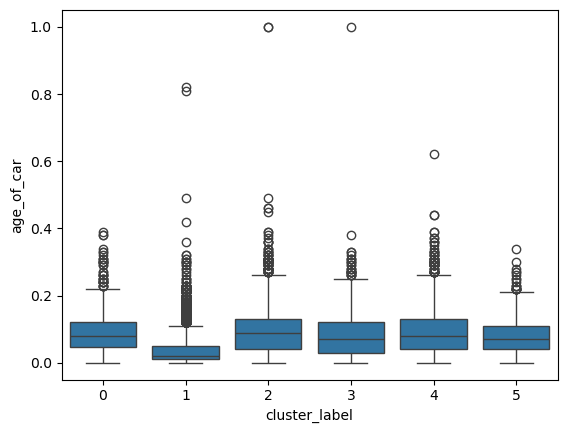

In [163]:
sns.boxplot(x="cluster_label", y="age_of_car", data=insurance_df_4)
plt.show()

In [159]:
cat_summary.T

cluster_label,0,1,2,3,4,5
policy_id,ID00004,ID00001,ID00006,ID00007,ID00008,ID00005
area_cluster,C8,C3,C8,C8,C8,C8
segment,B2,A,C2,C1,B2,A
model,M7,M1,M4,M9,M6,M3
fuel_type,Petrol,CNG,Diesel,Diesel,Petrol,Petrol
max_torque,113Nm@4400rpm,60Nm@3500rpm,250Nm@2750rpm,200Nm@1750rpm,113Nm@4400rpm,91Nm@4250rpm
max_power,88.50bhp@6000rpm,40.36bhp@6000rpm,113.45bhp@4000rpm,97.89bhp@3600rpm,88.50bhp@6000rpm,67.06bhp@5500rpm
engine_type,1.2 L K Series Engine,F8D Petrol Engine,1.5 L U2 CRDi,i-DTEC,K Series Dual jet,1.0 SCe
is_esc,Yes,No,Yes,No,No,No
is_adjustable_steering,Yes,No,Yes,Yes,Yes,No


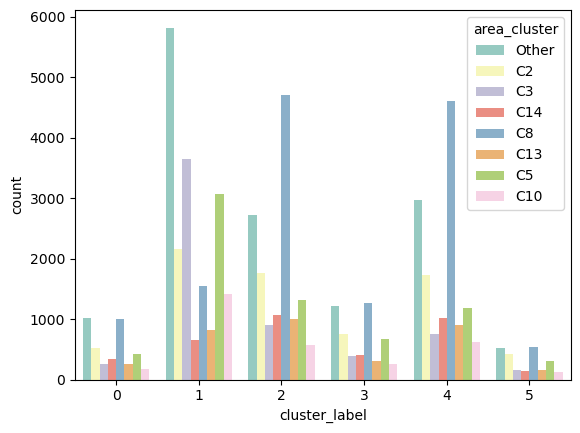

In [221]:
insurance_df_area = insurance_df_4.loc[~insurance_df_4["area_cluster"].isin(
    values_to_keep[0]), "area_cluster"] = "Other"

sns.countplot(data=insurance_df_4, x="cluster_label", 
              hue="area_cluster", palette="Set3")
plt.show()

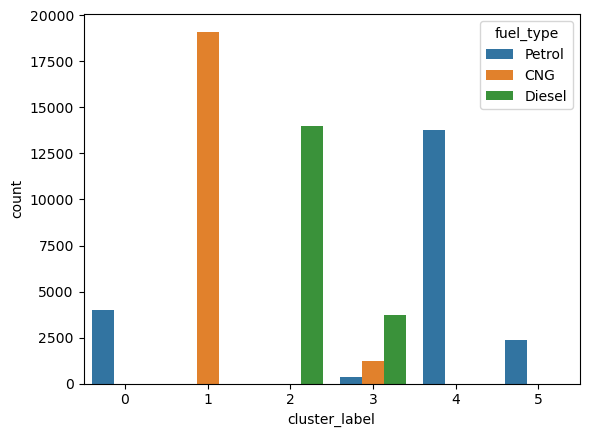

In [170]:
sns.countplot(data=insurance_df_4, x="cluster_label", hue="fuel_type")
plt.show()

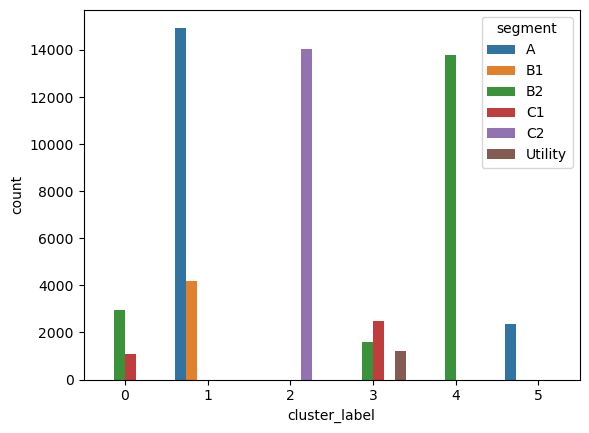

In [175]:
sns.countplot(data=insurance_df_4, x="cluster_label", hue="segment",
             hue_order=["A", "B1", "B2", "C1", "C2", "Utility"])
plt.show()

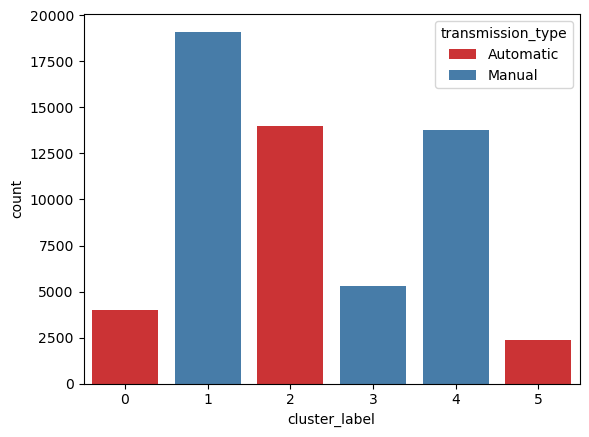

In [180]:
sns.countplot(data=insurance_df_4, x="cluster_label", hue="transmission_type", palette="Set1")
plt.show()

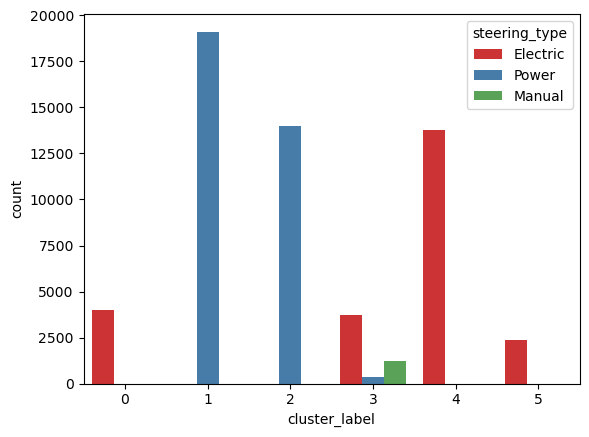

In [183]:
sns.countplot(data=insurance_df_4, x="cluster_label", hue="steering_type", palette="Set1")
plt.show()

Here are the most notable differences between the clusters for the numeric features:
 - Clusters 0, 4, and 5 use petrol, cluster 1 uses CNG, and cluster 2 and 3 use diesel
 - Cluster 1 has the least safety features, while clusters 0 and 2 have the most safety features
 - Clusters 0, 2, and 5 have automatic cars, while the other clusters have manual
 - Clusters 1 and 2 have power steering, while the other clusters primarily have electric steering

I will check if filing claims is more common in certain clusters.

In [194]:
insurance_df_4.groupby(
    ["cluster_label", "is_claim"])["is_claim"].count().unstack(fill_value=0)

is_claim,0,1
cluster_label,,
0,3739,281
1,17959,1162
2,13117,901
3,4947,337
4,12837,939
5,2245,128


In [196]:
claims_by_cluster = insurance_df_4.groupby(
    ["cluster_label", "is_claim"])["is_claim"].count().unstack(fill_value=0)
# Convert to percentages
claims_by_cluster = (claims_by_cluster.div(claims_by_cluster.sum(axis=1), axis=0) * 100)[1]

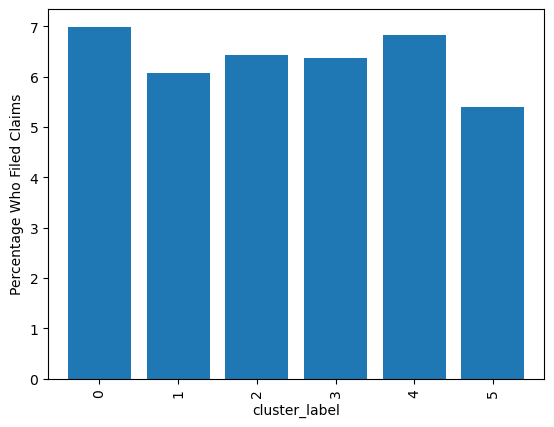

In [199]:
claims_by_cluster.plot(kind='bar', width=0.8)
plt.ylabel("Percentage Who Filed Claims")
plt.show()

The percentage of policyholders who file claims are about the same across all clusters. 

In [203]:
insurance_df_4["cluster_label"].value_counts(normalize=True).sort_index()

cluster_label
0    0.068610
1    0.326341
2    0.239248
3    0.090183
4    0.235117
5    0.040500
Name: proportion, dtype: float64

6.9% of policyholders belong to cluster 0, 32.6% belong to cluster 1, 23.9% belong to cluster 2, 9.0% belong to cluster 3, 23.5% belong to cluster 4, and 4.1% belong to cluster 5.

## Summary of Customer Segments

**Cluster 0: Small City Drivers with Modern Cars**

- Car Safety: High number of airbags, more safety features on the car despite lower NCAP rating
- Vehicle Type: Petrol fuel, automatic, electric steering
- Demographics: Small cities

Business Interpretation: Likely stable, safety-conscious customers with good vehicles and loyalty to the insurer; retain with loyalty discounts or bundled coverage.

**Cluster 1: New Customers with Unsafe Cars**

- Car Safety: Low number of airbags, less safety features on the car, and lower NCAP rating
- Vehicle Type: CNG fuel, manual, power steering, smaller cars, newer cars
- Demographics: Large cities, shortest average policy tenure

Business Interpretation: High-risk customers who are prone to churn; offer higher base rates for lower-safety cars.

**Cluster 2: Drivers with the Safest and Largest Cars**

- Car Safety: High number of airbags, more safety features on the car, and higher NCAP rating
- Vehicle Type: Diesel fuel, automatic, power steering, larger cars
- Demographics: Small cities

Business Interpretation: Premium, safety-conscious customers driving higher-end vehicles; good targets for long-term loyalty and upselling.

**Cluster 3: Drivers with Basic, Manual, Diesel Cars**

- Car Safety: Low number of airbags, high NCAP rating
- Vehicle Type: Diesel fuel, manual, electric steering
- Demographics: Medium-sized cities

Business Interpretation: Middle-market customers, budget-conscious, and moderate risk; good candidates for retention campaigns.

**Cluster 4: Reliable Customers in Small Cities with Basic, Manual Cars**

- Car Safety: Low number of airbags, moderate NCAP rating
- Vehicle Type: Petrol fuel, manual, electric steering
- Demographics: Small cities, highest average policy tenure

Business Interpretation: Stable, steady-income customers if engaged properly; offer renewal-based loyalty programs.

**Cluster 5: Big City Drivers with Basic, Modern Cars**

- Car Safety: Low number of airbags, moderate NCAP rating
- Vehicle Type: Petrol fuel, automatic, electric steering
- Demographics: Large cities

Business Interpretation: Low-risk, low-premium but profitable base segment; good candidates for cross-selling add-ons (zero depreciation, theft protection).

